<a href="https://colab.research.google.com/github/batlab-art/Introductions/blob/master/test_captcha_solve_running_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install necessary dependencies**

In [11]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [13]:
!wget https://github.com/shellkore/captcha-solver/blob/master/captchas/captcha015.png

--2020-09-23 15:18:30--  https://github.com/shellkore/captcha-solver/blob/master/captchas/captcha015.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘captcha015.png.1’

captcha015.png.1        [  <=>               ]  75.82K   212KB/s    in 0.4s    

2020-09-23 15:18:31 (212 KB/s) - ‘captcha015.png.1’ saved [77641]



# **Code**

In [14]:
img1  = cv2.imread('/content/captcha007.png',0)
img2 = cv2.imread('captcha002.png',0)

In [15]:
def showImage(img):
    plt.imshow(img,cmap='gray')  

In [16]:
croppedImg1 = img1[11:67,42:178]
croppedImg2 = img2[11:67,42:178]

In [17]:
blurImg1 = cv2.medianBlur(img1,3)
blurImg2 = cv2.medianBlur(img2,3)

In [18]:
blurImg1 = cv2.medianBlur(croppedImg1,3)
blurImg2 = cv2.medianBlur(croppedImg2,3)

In [19]:
def removeLineNoise(inputImg):
    img = inputImg
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            flag = False
            if(img[i,j]!=50 and img[i,j]!=255):
                for k in range(img.shape[0]):
                    if(img[k,j]==50):
                        flag = True

                if(flag):
                    img[i,j]=50
                else:
                    img[i,j]=255
    return img

In [20]:
outputImg1 = removeLineNoise(blurImg1)
outputImg2 = removeLineNoise(blurImg2)

# **Output**

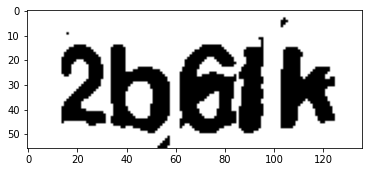

In [21]:
showImage(outputImg1)

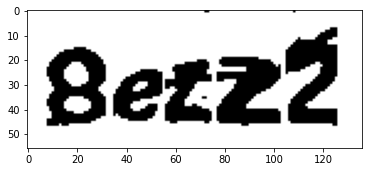

In [22]:
showImage(blurImg2)

In [23]:
textOutput1 = pytesseract.image_to_string(blurImg1)
textOutput1

'2béik\n\x0c'

In [24]:
textOutput2 = pytesseract.image_to_string(outputImg2)
textOutput2

'Ser22\n\x0c'

outout-miri